In [1]:
import glob
import numpy as np
import plotly as py
import cufflinks as cf
import pandas as pd

In [2]:
path_to_eval_logs = "../eval/20190317_RetinaNet_train_C_over_eval/test_day"
plot_title = "Train-C-Over @ Test-Day"

In [3]:
logs = glob.glob(path_to_eval_logs + "/**/*.txt", recursive = True)

In [4]:
df_iterations = pd.DataFrame()
last_iteration = -1
for log in logs:
    df = pd.read_csv(log)
    df = df.drop(columns = ["Unnamed: 12"])
    df["Iteration"] = last_iteration if log.split("_model_")[-1].split("_")[0] == "final" else int(log.split("_model_")[-1].split("_")[0])
    df_iterations = pd.concat([df_iterations, df], axis = 0)
    df_iterations = df_iterations.reset_index(drop = True)
    last_iteration = df["Iteration"]
df_iterations = df_iterations.sort_values(by = ['Iteration']).reset_index(drop = True)

In [5]:
df_iterations.head(3)

,AP,AP50,AP75,APs,APm,APl,AR@1,AR@10,AR,ARs,ARm,ARl,Iteration
0,0.174961,0.403917,0.134505,0.068727,0.326900,0.303367,0.067108,0.234452,0.268514,0.152022,0.456123,0.403952,2500
1,0.214250,0.468820,0.174367,0.094141,0.385068,0.376278,0.076707,0.271523,0.309762,0.187357,0.495141,0.458290,5000
2,0.224662,0.486689,0.185830,0.097898,0.403975,0.397142,0.079389,0.280890,0.320327,0.197383,0.514342,0.464925,7500


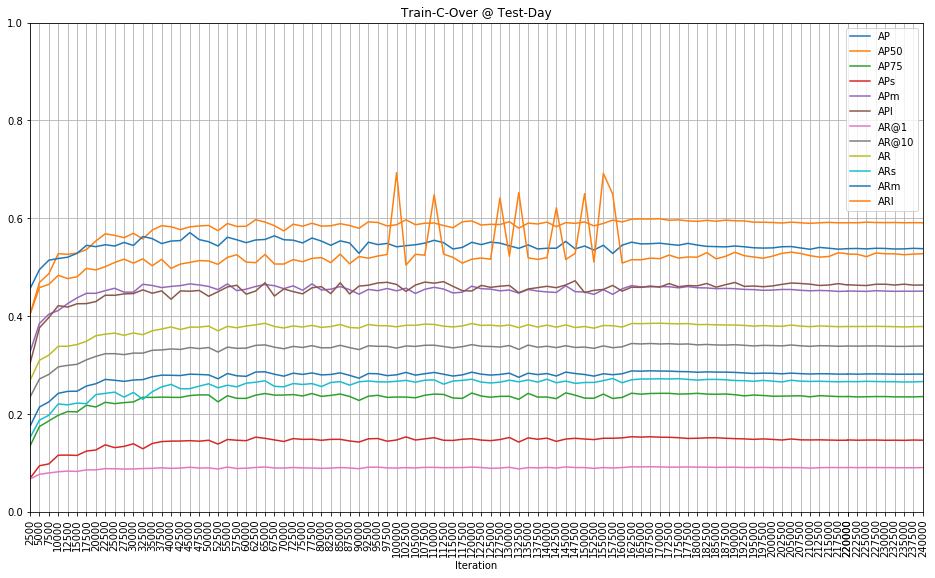

In [8]:
df_iterations.plot(x = 'Iteration', y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], xticks = df_iterations["Iteration"], rot = 90, ylim = (0, 1), title = plot_title, grid = True, figsize = (16, 9))

In [7]:
cf.go_offline(connected = True)
config = {
    "modeBarButtonsToRemove": ["sendDataToCloud"],
    "displaylogo": False
}
layout = {
    "title": plot_title,
    "xaxis": {
        "title": "Iteration",
        "tickvals": df_iterations["Iteration"],
    },    
    "yaxis": {
        "title": "Score"
    },
    "width": 960,
    "height": 540
}
fig = df_iterations.iplot(x = 'Iteration', y = ["AP", "AP50", "AP75", "APs", "APm", "APl", "AR@1", "AR@10", "AR", "ARs", "ARm", "ARl"], layout = layout, asFigure = True)
py.offline.iplot(fig, show_link = False, config = config)